In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
import pandas as pd
import re as RegEx

ModuleNotFoundError: No module named 'wordcloud'

# Objective

The classification of news headlines is a critical responsibility for connecting people to the appropriate material. The classification of news headlines is a type of text classification that is divided into three parts: feature extraction, classifier selection, and evaluations. In this post, we use the Kaggle platform's dataset to identify news headlines over a period of time. We intend to apply the Naive Bayes algorithm to forecast the news category. In order to achieve the Final accuracy, we contrasted the accuracy of this naive bayes with smoothing.

## Methodology - Naive Bayes Classifier

A probabilistic machine learning model called a Naive Bayes classifier is utilised to perform classification tasks. Given that event B has occurred, the Bayes theorem provides us the conditional probability of event A.

<br />
$P(Category|Word) = \frac{P(Word|Category)P(Category)}{P(Word)}$

### Types of NBC:
#### Multinomial Naive Bayes -  Multiple classification
#### Bernoulli Naive Bayes:  - boolean variables.
#### Gaussian Naive Bayes -  values are sampled from a gaussian distribution

## Data Analysis
---

Now we will perform the following tasks on the given data

- Explore the aspects of given data 
- Clean up the missing variables 
- explore how many categories are there in the news dataset 
- Extract the relevant features from the set for analysis

In [6]:
linFLag = True
df = pd.read_json('data.json', lines = linFLag)

In [7]:
print(" ---- STATISTICS OF THE DATSET ------------")
print(" The Number of Data points : ", df.shape[0])
print(" Number of Categories : ", len(df.category.value_counts()))
print(" Number of Authors : ", len(df.authors.value_counts()))

 ---- STATISTICS OF THE DATSET ------------
 The Number of Data points :  200853
 Number of Categories :  41
 Number of Authors :  27993


Here we are interested in the headlines and the assosiated categories, So we will try to visualise the number of categories that are available in the given dataset. we wil use WORDCLOUD 

(-0.5, 875.5, 466.5, -0.5)

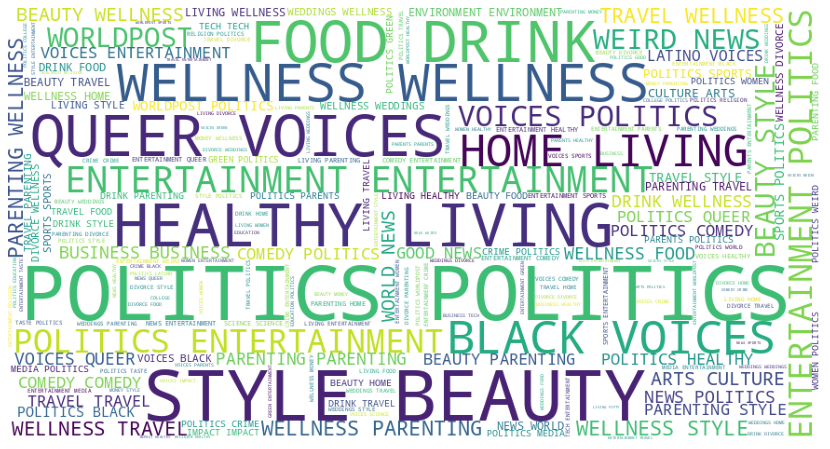

In [8]:
from wordcloud import WordCloud
us=(" ").join(df.category.to_list())
wc = WordCloud( height = 467, width = 876,background_color='white').generate(us)
plt.figure(figsize=(15,8))
plt.imshow(wc)
plt.axis("off")


## Analyse the words in the given Data
---

Extract all the words in the given data and then we will plot the word cloud of important words in the given data

- Convert all words into lower case
- Remove all Special Charecters from the words


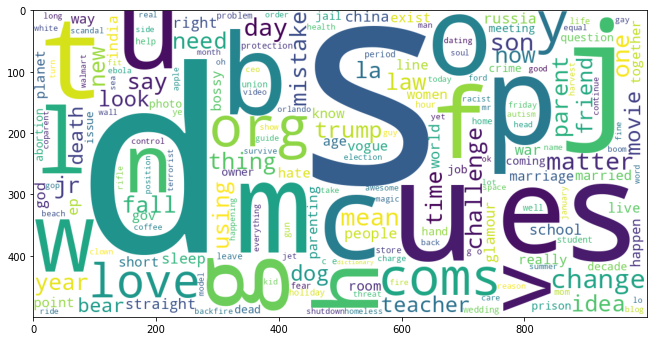

In [9]:
words = set()
for category,value in zip(df.category,df.headline):
    values = value.split(' ')
    values = list(map(str.lower,values))
    
    for k in values:
        ## Existing Values
        k = str(k)
        k_new = RegEx.sub('[^a-zA-Z0-9 \n\.]', '', k)
        words.add(k_new)

words = list(words)
us=(" ").join(words)
wordcloud = WordCloud( height = 500, width = 1000,background_color='white').generate(us)
plt.figure(figsize=(11,6))
plt.imshow(wordcloud)


## Remove Stopwords and then plot the keywords
---

Stopwords are English words that does not contribute significantly to a sentence's meaning. They can be ignored without jeopardising the meaning or context of the sentence. These words generally wil be removed from any analysis to make sure that they donot imapct the accuracy of the current model.


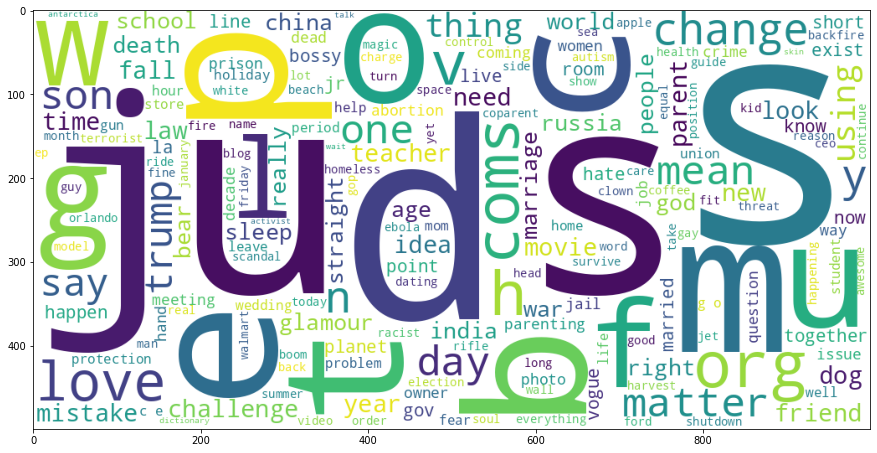

In [12]:
words = set()
for category,value in zip(df.category,df.headline):
    values = value.split(' ')
    values = list(map(str.lower,values))
    
    for k in values:
        ## Existing Values
        k = str(k)
        k_new = RegEx.sub('[^a-zA-Z0-9 \n\.]', '', k)
        words.add(k_new)

STOPWORDS = ['just', 'not', 'her', 'has', 'to', 'their', 'it', 'himself', 'by', 'yourselves', 'nor', 'further', 'where', 'will', 'above', 'other', 'you', 'that', 'but', 'my', 'its', 's', 'because', 'she', 'before', 'at', 'below', 'such', 'had', 'each', 'who', 'them', 'no', 'both', 'your', 'did', 'him', 'is', 'about', 'what', 'from', 'being', 'his', 'again', 'while', 'more', 'or', 'whom', 't', 'be', 'am', 'now', 'ourselves', 'he', 'myself', 'for', 'this', 'themselves', 'hers', 'very', 'the', 'should', 'how', 'here', 'with', 'under', 'until', 'too', 'having', 'does', 'when', 'why', 'and', 'they', 'our', 'after', 'only', 'was', 'out', 'i', 'of', 'those', 'through', 'between', 'yours', 'doing', 'herself', 'me', 'once', 'most', 'off', 'a', 'do', 'we', 'into', 'up', 'if', 'any', 'all', 'which', 'than', 'don', 'in', 'own', 'on', 'as', 'so', 'were', 'same', 'ours', 'during', 'itself', 'are', 'some', 'theirs', 'then', 'can', 'yourself', 'been', 'over', 'against', 'these', 'have', 'there', 'few', 'down', 'an']
words = list(words)
newword = []
for word in words:
    if word not in STOPWORDS:
        if ( len(word) > 2):
            newword.append(word)

us=(" ").join(newword)
wordcloud = WordCloud( height = 500,width = 1000, background_color='white').generate(us)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)


## Identify frequency for each word in each Category

Now we will identfy the frequency of each word in each category , this will be used to obtain the conditional probabilities

In [48]:
def obtainFrequencyMatrix(df):

    wordDictionary = {}
    count = df['category'].value_counts()
    for category,value in zip(df.category,df.headline):
        values = value.split(' ')
        values = list(map(str.lower,values))

        for k in values:
            ## Existing Values
            k = str(k)
            k_new = RegEx.sub('[^a-zA-Z0-9 \n\.]', '', k)
            if( k_new not in wordDictionary ):
                wordDictionary[k_new] = {key: 0 for key, value in count.items()}

            wordDictionary[k_new][category] +=1;
    freqWords = pd.DataFrame(wordDictionary)
    return freqWords

freqMatrix = obtainFrequencyMatrix(df)
freqMatrix.head()
print(" NUmber of Unique Words : " ,  len(freqMatrix.columns))
totalLen = len(freqMatrix.columns)

 NUmber of Unique Words :  70458


### Removing Stop words

In [50]:
## LEts remove all the Stop words from the given list 
for i in STOPWORDS:
    try :
        freqMatrix = freqMatrix.drop(i,axis=1)
    except KeyError:
        freqMatrix = freqMatrix;
print("Number of Unique Words : " ,  len(freqMatrix.columns))
print("Number of Stop words removed : " ,totalLen - len(freqMatrix.columns) )

 NUmber of Unique Words :  70331
Number of Stop words removed :  127


## Compute the probability 

Conditional probability is a measure of the likelihood of an event occurring given that another event has previously occurred (via assumption, presumption, statement, or evidence). 


Here we will compute the probability of `P(word | category)` using the frequency matrix

In [200]:
def ConditionalProbability(freqMatrix):
    Prob = freqMatrix.copy(deep=True)
    Prob = Prob.div(Prob.sum(axis=1), axis=0)
    
    return Prob
ConditionalProb = ConditionalProbability(freqMatrix)
ConditionalProb.head(5)

,2,mass,shootings,texas,last,week,1,tv,smith,joins,...,gregoire,nobbs,tinker,unsuitable,allard,hoorns,songline,aneesh,thorsten,heins
POLITICS,0.000548,0.000416,0.000214,0.001030,0.000585,0.000696,0.000383,0.000206,0.000074,0.000165,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
WELLNESS,0.001112,0.000082,0.000051,0.000072,0.000649,0.000546,0.001019,0.000206,0.000062,0.000021,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
ENTERTAINMENT,0.002082,0.000106,0.000033,0.000138,0.000830,0.000740,0.000700,0.001545,0.000667,0.000293,...,0.0,0.0,0.0,0.000008,0.0,0.0,0.0,0.0,0.0,0.0
TRAVEL,0.000758,0.000052,0.000000,0.000362,0.000568,0.000706,0.000585,0.000241,0.000017,0.000017,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
STYLE & BEAUTY,0.000288,0.000000,0.000000,0.000052,0.000236,0.008806,0.000170,0.000301,0.000157,0.000092,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


## TEST-TRAIN DATA SPLITUP
---
we need to beakup the given dataset into test, training and development dataset 


In [59]:
Training, Test = np.split(df.sample (frac=1 ,random_state=32), 
                       [int(0.8*len(df))])
train_kfold, dev_kfold = np.split(Training.sample(frac=1, random_state=21), 
                       [int(.8*len(Training))])

print(" Testing Dataset  : " , Test.shape[0])
print(" Training Dataset : " , train_kfold.shape[0])
print(" Dev Dataset      : " , dev_kfold.shape[0])

 Testing Dataset  :  40171
 Training Dataset :  128545
 Dev Dataset      :  32137


### Encoding of output Data

we need to convert the categorical data of the output into an integer data using Encoding method. We will use dictionaries to encode the data

In [123]:
def encodingLabels(ConditionalProb):
    CategoricalFeatures = ConditionalProb.index.to_list()
    PredictionDict = dict(zip(CategoricalFeatures,list(range(len(CategoricalFeatures))) ))
    return CategoricalFeatures,PredictionDict

### Word Extractor

This function will be to extract all the unique words in the system to a list for the prediction purposes


In [107]:
def WordExtractor(dev_kfold):
    yActual = dev_kfold.category.to_list()
    STOPWORDS = ['is', 'how', 'says', '50', '5', 'as', 'this', 'on', 'my', 'of', 'may', 'not', 'what', 'after', 'why', 'for', 'its', 'at', 'from', 'her', 'you', 'will', '10', 'that', 'to', 'a', 'are', 'who', 'i', 'it', 'and', 'the', 'by', 'be', 'your', 'with', 'in']
    Y_test = []
    for line in dev_kfold.headline.to_list():
        lines = line.split(' ')
        values = list(map(str.lower,lines))
        newlist = [];
        for k in values:
            k = str(k);
            k_new = RegEx.sub('[^a-zA-Z0-9 \n\.]', '', k)
            if(k_new not in STOPWORDS):
                newlist.append(k_new)

        Y_test.append(newlist)
    
    return Y_test

### Bayes CLassifier

THis fucntion will perfrm the multiplication of the conditional probabilities and the prior probability in order to compute the prediction

In [66]:
def BayesClassifier(Y_test,PREDICTIONLABEL,priorProbability,ConditionalProb):
    Y_pred = []

    for data in Y_test:
        probList = []
        for cat in PREDICTIONLABEL:
            probList.append(priorProbability[cat])
        probList = np.array(probList);
        for word in data:
            try:
                probList *= ConditionalProb[word].to_numpy()
            except KeyError:
                probList;
        Y_pred.append(probList)

    Y_pred_df = pd.DataFrame(Y_pred)
    
    return Y_pred_df

### Prior Probability
Computes the prior Probability

In [111]:
def priorProbabilityCalc(df):
    count = df['category'].value_counts()
    priorProbability = {key: value for key, value in count.items()}
    for k,v in count.items():
        priorProbability[k] = v/train_kfold.shape[0]
    return priorProbability

### Freq Matrix

In [88]:
def obtainFrequencyMatrix_new(df):

    wordDictionary = {}
    count = df['category'].value_counts()
    for category,value in zip(df.category,df.headline):
        values = value.split(' ')
        values = list(map(str.lower,values))

        for k in values:
            ## Existing Values
            k = str(k)
            k_new = RegEx.sub('[^a-zA-Z0-9 \n\.]', '', k)
            if( k_new not in wordDictionary ):
                wordDictionary[k_new] = {key: 0 for key, value in count.items()}

            wordDictionary[k_new][category] +=1;
    freqMatrix = pd.DataFrame(wordDictionary)
    STOPWORDS = ['is', 'how', 'says', '50', '5', 'as', 'this', 'on', 'my', 'of', 'may', 'not', 'what', 'after', 'why', 'for', 'its', 'at', 'from', 'her', 'you', 'will', '10', 'that', 'to', 'a', 'are', 'who', 'i', 'it', 'and', 'the', 'by', 'be', 'your', 'with', 'in']
    freqMatrix = freqMatrix.drop(STOPWORDS,axis=1)

    
    return freqMatrix

### Post processing - Error Metric

This will evaluate the accuracy metric for the classification after identifying all appropriate parameters

In [116]:
def predictionAccuracy(Y_pred_df,PREDICTIONLABEL_DICT,yActual):
    prevSize = Y_pred_df.shape[0];
    ##Remvove the entries with zero probability , to compute accuracy
    Y_pred_df["idmax"] = Y_pred_df.idxmax(axis=1)
    Y_pred_df["sum"] = Y_pred_df.sum(axis=1)


    yPred_num = [];
    yActual_num = [];
    for i in range(len(yActual)):
    #     if(Y_pred_df["sum"][i] > 0):
        yActual_num.append(PREDICTIONLABEL_DICT[yActual[i]] )
        yPred_num.append(Y_pred_df["idmax"][i])

    from sklearn.metrics import accuracy_score, f1_score , precision_score

    return accuracy_score(yActual_num,yPred_num)

## CROSS VALIDATION 
 Cross-validation is  method of testing ML models that involves training numerous models on subsets of the available input data and then testing those on a different part of the data.The input data is divided into k subgroups during k-fold validation. All but one (k-1) of the subsets are used to train an ML model, which is then tested on the subset which was not used for training. .

In [161]:
from sklearn.metrics import accuracy_score
def CrossValidation(Training,kfold):
    accuracyArray = []
    f1Array = []
    precisionArray = []
    for iterNum in range(kfold):
        print("Performing Cross Validation : " , iterNum)
        train_kfold, dev_kfold = \
                  np.split(Training.sample(frac=1, random_state=np.random.randint(0,100)), 
                           [int(.8*len(Training))])
        
        count = train_kfold['category'].value_counts()
        priorProbability = {key: value for key, value in count.items()}
        for k,v in count.items():
            priorProbability[k] = v/train_kfold.shape[0];
        
        wordList = []
        

        mainDictionary = {}
        for category,value in zip(train_kfold.category,train_kfold.headline):
            values = value.split(' ')
            values = list(map(str.lower,values))

            for k in values:
                ## Existing Values
                k = str(k)
                k_new = RegEx.sub('[^a-zA-Z0-9 \n\.]', '', k)
                if( k_new not in mainDictionary ):
                    mainDictionary[k_new] = {key: 0 for key, value in count.items()}

                mainDictionary[k_new][category] +=1;
                
        freqWords = pd.DataFrame(mainDictionary)
        avoidList = ['the', 'to', 'a','of','in','and','for','is','on','your','with','my','you','at','as','this','why','how','what','who','i','are','that']
        freqWords = freqWords.drop(avoidList,axis=1)
        ConditionalProb = freqWords.copy(deep=True)
        
        ConditionalProb = ConditionalProb.div(ConditionalProb.sum(axis=1), axis=0)
        
        yActual = dev_kfold.category.to_list()

        Y_test = []
        for line in dev_kfold.headline.to_list():
            lines = line.split(' ')
            values = list(map(str.lower,lines))
            newlist = [];
            for k in values:
                k = str(k);
                k_new = RegEx.sub('[^a-zA-Z0-9 \n\.]', '', k)
                if(k_new not in avoidList):
                    newlist.append(k_new)

            Y_test.append(newlist)
        
        Y_pred = []
        
        for data in Y_test:
            probList = []
            for cat in PREDICTIONLABEL:
                probList.append(priorProbability[cat])
            probList = np.array(probList);
            for word in data:
                try:
                    probList *= ConditionalProb[word].to_numpy()
                except KeyError:
                    probList;
            Y_pred.append(probList)
        
        Y_pred_df = pd.DataFrame(Y_pred)

        prevSize = Y_pred_df.shape[0];
#         print("Actual Size : " , prevSize)
        ##Remvove the entries with zero probability , to compute accuracy
        Y_pred_df["idmax"] = Y_pred_df.idxmax(axis=1)
        Y_pred_df["sum"] = Y_pred_df.sum(axis=1)


        yPred_num = [];
        yActual_num = [];
        for i in range(len(yActual)):
        #     if(Y_pred_df["sum"][i] > 0):
            yActual_num.append(PREDICTIONLABEL_DICT[yActual[i]] )
            yPred_num.append(Y_pred_df["idmax"][i])

        accuracyArray.append(accuracy_score(yActual_num,yPred_num))
        
        print("     Accuracy  : " , accuracyArray[iterNum])

    
    return accuracyArray

# Experimentation

Using the above functions, we will use them to perform the validation on our dev dataset. 

In [164]:
accuracyArray = CrossValidation(Training,5)

Performing Cross Validation :  0
     Accuracy  :  0.3996950555434546
Performing Cross Validation :  1
     Accuracy  :  0.38454118306002427
Performing Cross Validation :  2
     Accuracy  :  0.39966393876217443
Performing Cross Validation :  3
     Accuracy  :  0.38454118306002427
Performing Cross Validation :  4
     Accuracy  :  0.39512088869527334


Text(0.5, 1.0, 'Accuracy across all k fold iterations')

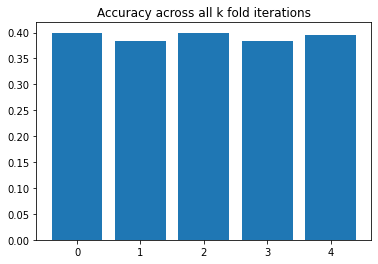

In [165]:
plt.bar([x for x in range(len(accuracyArray))],accuracyArray)
plt.title("Accuracy across all k fold iterations")

##  Smoothing
If query point contains a new observation, which is not yet seen in training data while calculating probabilities this will result in zero probability

In [176]:
def crossValidationNaiveBayesWithSmoothing(Training,kfold,alpha,testFlag):
    accuracyArray = []
    f1Array = []
    precisionArray = []
    for iterNum in range(kfold):
        print("Performing Cross Validation : " , iterNum)
        train_kfold, dev_kfold = \
                  np.split(Training.sample(frac=1, random_state=np.random.randint(0,100)), 
                           [int(.8*len(Training))])
        count = train_kfold['category'].value_counts()
        priorProbability = {key: value for key, value in count.items()}
        for k,v in count.items():
            priorProbability[k] = v/train_kfold.shape[0];
        
        wordList = []
        

        mainDictionary = {}
        for category,value in zip(train_kfold.category,train_kfold.headline):
            values = value.split(' ')
            values = list(map(str.lower,values))

            for k in values:
                ## Existing Values
                k = str(k)
                k_new = RegEx.sub('[^a-zA-Z0-9 \n\.]', '', k)
                if( k_new not in mainDictionary ):
                    mainDictionary[k_new] = {key: 0 for key, value in count.items()}

                mainDictionary[k_new][category] +=1;
                
        freqWords = pd.DataFrame(mainDictionary)
        avoidList = ['the', 'to', 'a','of','in','and','for','is','on','your','with','my','you','at','as','this','why','how','what','who','i','are','that']
        freqWords = freqWords.drop(avoidList,axis=1)
        freqWords += alpha;
        ConditionalProb = freqWords.copy(deep=True)
        
        
        ConditionalProb = ConditionalProb.div(ConditionalProb.sum(axis=1) + len(PREDICTIONLABEL)*alpha, axis=0)
        
        yActual = dev_kfold.category.to_list()

        Y_test = []
        for line in dev_kfold.headline.to_list():
            lines = line.split(' ')
            values = list(map(str.lower,lines))
            newlist = [];
            for k in values:
                k = str(k);
                k_new = RegEx.sub('[^a-zA-Z0-9 \n\.]', '', k)
                if(k_new not in avoidList):
                    newlist.append(k_new)

            Y_test.append(newlist)
        
        Y_pred = []
        
        for data in Y_test:
            probList = []
            for cat in PREDICTIONLABEL:
                probList.append(priorProbability[cat])
            probList = np.array(probList);
            for word in data:
                try:
                    probList *= ConditionalProb[word].to_numpy()
                except KeyError:
                    probList *= np.ones_like(ConditionalProb.iloc[:,0])*(alpha/len(PREDICTIONLABEL));
            Y_pred.append(probList)
        
        Y_pred_df = pd.DataFrame(Y_pred)

        prevSize = Y_pred_df.shape[0];
#         print("Actual Size : " , prevSize)
        ##Remvove the entries with zero probability , to compute accuracy
        Y_pred_df["idmax"] = Y_pred_df.idxmax(axis=1)
        Y_pred_df["sum"] = Y_pred_df.sum(axis=1)


        yPred_num = [];
        yActual_num = [];
        for i in range(len(yActual)):
        #     if(Y_pred_df["sum"][i] > 0):
            yActual_num.append(PREDICTIONLABEL_DICT[yActual[i]] )
            yPred_num.append(Y_pred_df["idmax"][i])

        accuracyArray.append(accuracy_score(yActual_num,yPred_num))

        print("     Accuracy  : " , accuracyArray[iterNum])

    
    return sum(accuracyArray)/len(accuracyArray)

In [177]:
Alpha  = [0,0.5,0.8,0.9,1,10]

results = {}
for i in Alpha:
    results[i] = crossValidationNaiveBayesWithSmoothing(Training,5,i)

Performing Cross Validation :  0
     Accuracy  :  0.3592121230979867
Performing Cross Validation :  1
     Accuracy  :  0.35606932818869214
Performing Cross Validation :  2
     Accuracy  :  0.31611538102498676
Performing Cross Validation :  3
     Accuracy  :  0.3441204841771167
Performing Cross Validation :  4
     Accuracy  :  0.36559106326041635
Performing Cross Validation :  0
     Accuracy  :  0.5255935526029187
Performing Cross Validation :  1
     Accuracy  :  0.5246600491645145
Performing Cross Validation :  2
     Accuracy  :  0.5246600491645145
Performing Cross Validation :  3
     Accuracy  :  0.5162896350001556
Performing Cross Validation :  4
     Accuracy  :  0.500233375859601
Performing Cross Validation :  0
     Accuracy  :  0.5049942433954632
Performing Cross Validation :  1
     Accuracy  :  0.4997666241403989
Performing Cross Validation :  2
     Accuracy  :  0.4900270715997137
Performing Cross Validation :  3
     Accuracy  :  0.5060833307402682
Performing Cross V

Text(0.5, 1.0, 'Accuracy with/without Smoothing ')

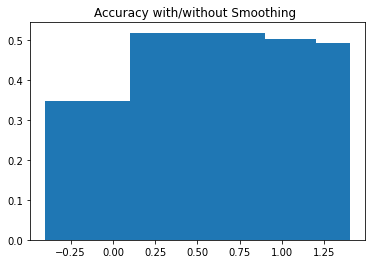

In [180]:
resultsNew = results
resultsNew.pop(10,None)
plt.bar(*zip(*results.items()))
plt.title("Accuracy with/without Smoothing ")

## Accuracy on the Testing Data 

Now we will test the accuracy on the testing data 


In [192]:
def crossValidationNaiveBayesWithSmoothing_test(train,PropConst,alpha):
    train_kfold =  train
    count = train_kfold['category'].value_counts()
    priorProbability = {key: value for key, value in count.items()}
    for k,v in count.items():
        priorProbability[k] = v/train_kfold.shape[0];

    wordList = []


    mainDictionary = {}
    for category,value in zip(train_kfold.category,train_kfold.headline):
        values = value.split(' ')
        values = list(map(str.lower,values))

        for k in values:
            ## Existing Values
            k = str(k)
            k_new = RegEx.sub('[^a-zA-Z0-9 \n\.]', '', k)
            if( k_new not in mainDictionary ):
                mainDictionary[k_new] = {key: 0 for key, value in count.items()}

            mainDictionary[k_new][category] +=1;

    freqWords = pd.DataFrame(mainDictionary)
    avoidList = ['the', 'to', 'a','of','in','and','for','is','on','your','with','my','you','at','as','this','why','how','what','who','i','are','that']
    freqWords = freqWords.drop(avoidList,axis=1)
    freqWords += alpha;
    ConditionalProb = freqWords.copy(deep=True)


    ConditionalProb = ConditionalProb.div(ConditionalProb.sum(axis=1) + len(PREDICTIONLABEL)*alpha, axis=0)

    yActual = dev_kfold.category.to_list()

    Y_test = []
    for line in dev_kfold.headline.to_list():
        lines = line.split(' ')
        values = list(map(str.lower,lines))
        newlist = [];
        for k in values:
            k = str(k);
            k_new = RegEx.sub('[^a-zA-Z0-9 \n\.]', '', k)
            if(k_new not in avoidList):
                newlist.append(k_new)

        Y_test.append(newlist)

    Y_pred = []
    
    for data in Y_test:
        probList = []
        for cat in PREDICTIONLABEL:
            probList.append(priorProbability[cat]*PropConst)
        probList = np.array(probList);
        for word in data:
            try:
                probList *= ConditionalProb[word].to_numpy()
            except KeyError:
                probList *= np.ones_like(ConditionalProb.iloc[:,0])*(alpha/len(PREDICTIONLABEL));
        Y_pred.append(probList)

    Y_pred_df = pd.DataFrame(Y_pred)

    prevSize = Y_pred_df.shape[0];
#         print("Actual Size : " , prevSize)
    ##Remvove the entries with zero probability , to compute accuracy
    Y_pred_df["idmax"] = Y_pred_df.idxmax(axis=1)
    Y_pred_df["sum"] = Y_pred_df.sum(axis=1)


    yPred_num = [];
    yActual_num = [];
    for i in range(len(yActual)):
    #     if(Y_pred_df["sum"][i] > 0):
        yActual_num.append(PREDICTIONLABEL_DICT[yActual[i]] )
        yPred_num.append(Y_pred_df["idmax"][i])


    print("     Accuracy  : " ,accuracy_score(yActual_num,yPred_num))
#         print("     Precision : " , precisionArray[iterNum])
#         print("     F1        : " , f1Array[iterNum])

    return accuracy_score(yActual_num,yPred_num)

In [193]:
accuracy = crossValidationNaiveBayesWithSmoothing_test(Test,10,1)
print(" The final accuracy of our model is : " , accuracy*100 , " % ")

     Accuracy  :  0.42689112238230076
 The final accuracy of our model is :  42.689112238230074  % 


##  common words in each category

In [195]:
wordList = []
import re

count = Training['category'].value_counts()
mainDictionary = {}
for category,value in zip(df.category,df.headline):
    values = value.split(' ')
    values = list(map(str.lower,values))
    
    for k in values:
        ## Existing Values
        k = str(k)
        k_new = re.sub('[^a-zA-Z0-9 \n\.]', '', k)
        if( k_new not in mainDictionary ):
            mainDictionary[k_new] = {key: 0 for key, value in count.items()}
        
        mainDictionary[k_new][category] +=1;

freqWords = pd.DataFrame(mainDictionary)
avoidList = ['the', 'to', 'a','of','in','and','for','is','on','your','with','my','you','at','as',\
             'after','her','may','this','why','how','what','who','i','are','that','be','it','from','its','not','will','says','by','5','10','50']
freqWords = freqWords.drop(avoidList,axis=1)
freqWords += 1;
ConditionalProb = freqWords.copy(deep=True)


ConditionalProb = ConditionalProb.div(ConditionalProb.sum(axis=1) + len(PREDICTIONLABEL)*1, axis=0)
nlargest = 10
order = np.argsort(-ConditionalProb.values, axis=1)[:, :nlargest]
result = pd.DataFrame(ConditionalProb.columns[order], 
                      columns=['top{}'.format(i) for i in range(1, nlargest+1)],
                      index=ConditionalProb.index)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: DeprecationWarning: Support for multi-dimensional indexing (e.g. `index[:, None]`) on an Index is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


In [196]:
result

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10
POLITICS,trump,donald,trumps,gop,clinton,about,obama,hillary,new,his
WELLNESS,study,health,life,can,cancer,sleep,new,do,could,more
ENTERTAINMENT,new,about,his,trump,,star,first,out,movie,up
TRAVEL,photos,travel,best,new,world,most,video,hotel,,hotels
STYLE & BEAUTY,photos,fashion,style,,week,video,photo,more,new,dress
PARENTING,kids,parents,video,baby,mom,about,children,parenting,day,moms
HEALTHY LIVING,health,about,can,life,more,ways,sleep,new,when,people
QUEER VOICES,gay,new,queer,lgbt,trans,about,out,transgender,lgbtq,marriage
FOOD & DRINK,recipes,photos,best,food,recipe,day,make,video,,new
BUSINESS,business,women,wall,,new,about,most,ceo,247,st.


# References
- https://medium.com/analytics-vidhya/intuition-behind-naive-bayes-algorithm-laplace-additive-smoothing-e2cb43a82901
- https://faculty.cc.gatech.edu/~bboots3/CS4641-Fall2018/Lecture10/10_NaiveBayes.pdf
- https://stats.stackexchange.com/questions/108797/in-naive-bayes-why-bother-with-laplace-smoothing-when-we-have-unknown-words-in
- https://www.kaggle.com/datasets/rmisra/news-category-dataset